# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
#download the dataset
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [2]:
#open downloaded text file and read it
with open('superhero/superheroes.txt', 'r') as f:
  data = f.read()

data[:100] 

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [3]:
#import tensorflow and print its current version

import tensorflow as tf

print(tf.__version__)

2.8.2


In [4]:
#instantiate the tokenizer 
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [5]:
#fit the tokenizer on the text

tokenizer.fit_on_texts(data)

In [6]:
#create dictionary of indexed characters

char_to_index = tokenizer.word_index
index_to_char = dict((v, k) for k, v in char_to_index.items())

print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 3

1. Converting between names and sequences

In [7]:
#print out first 10 names in the dataset
names = data.splitlines()  #splits the dataset by \n
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [8]:
#create character sequence
tokenizer.texts_to_sequences(names[0])  

[[25], [16], [12], [20], [2], [1]]

In [9]:
#define name_to_seq function

def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0]for c in name]


In [10]:
#test the function
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [11]:
#define name_to_seq function
def seq_to_name(seq):
  return ''.join([ index_to_char[i] for i in seq if i != 0])

In [12]:
#test the function
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [13]:
#create sequences
sequences = []

for name in names:
  seq = name_to_seq(name)
  if len(seq) >= 2:
    sequences += [seq[:i] for i in range(2, len(seq) + 1 )]

In [14]:
sequences[:10]  #print out first 10 sequences

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [15]:
#print out the maximum character lenght in the dataset
max_len = max([len(x) for x in sequences])
print(max_len)

33


In [16]:
#pad the sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen = max_len
)

print(padded_sequences[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]


In [17]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [18]:
#split the dataset in examples(x) and labels(y)
x, y = padded_sequences[:, :-1], padded_sequences[:, -1] 
                                                  
print(x.shape, y.shape)

(88279, 32) (88279,)


In [19]:
#split the data in train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(66209, 32) (66209,) (22070, 32) (22070,)


In [20]:
#print out the number of characters in the dictionary
num_chars = len(char_to_index.keys()) + 1
print(num_chars)

29


## Task 6: Creating the Model

In [21]:
#creating the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential([
                    Embedding(num_chars, 8, input_length = max_len-1),
                    Conv1D(64, 5, strides = 1, activation = 'tanh', padding = 'causal'),
                    MaxPool1D(2),
                    LSTM(32),
                    Dense(num_chars, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 8)             232       
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            2624      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 29)                957       
                                                                 
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
____________________________________________________

## Task 7: Training the Model

In [22]:
#train the model

h = model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 50, verbose = 2,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)])

Epoch 1/50
2070/2070 - 25s - loss: 2.7292 - accuracy: 0.1912 - val_loss: 2.5944 - val_accuracy: 0.2188 - 25s/epoch - 12ms/step
Epoch 2/50
2070/2070 - 11s - loss: 2.5352 - accuracy: 0.2362 - val_loss: 2.5077 - val_accuracy: 0.2504 - 11s/epoch - 5ms/step
Epoch 3/50
2070/2070 - 11s - loss: 2.4707 - accuracy: 0.2549 - val_loss: 2.4599 - val_accuracy: 0.2570 - 11s/epoch - 5ms/step
Epoch 4/50
2070/2070 - 11s - loss: 2.4310 - accuracy: 0.2627 - val_loss: 2.4341 - val_accuracy: 0.2648 - 11s/epoch - 5ms/step
Epoch 5/50
2070/2070 - 10s - loss: 2.3980 - accuracy: 0.2698 - val_loss: 2.4013 - val_accuracy: 0.2720 - 10s/epoch - 5ms/step
Epoch 6/50
2070/2070 - 10s - loss: 2.3664 - accuracy: 0.2813 - val_loss: 2.3807 - val_accuracy: 0.2792 - 10s/epoch - 5ms/step
Epoch 7/50
2070/2070 - 11s - loss: 2.3403 - accuracy: 0.2894 - val_loss: 2.3598 - val_accuracy: 0.2864 - 11s/epoch - 5ms/step
Epoch 8/50
2070/2070 - 11s - loss: 2.3161 - accuracy: 0.2963 - val_loss: 2.3469 - val_accuracy: 0.2933 - 11s/epoch - 

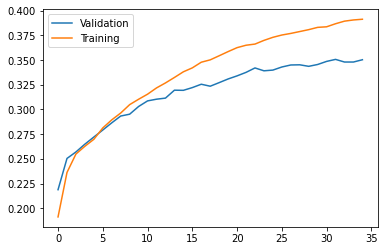

In [23]:
#visualize the trained model
from matplotlib import pyplot as plt

epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label = 'Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label = 'Training')
plt.legend()
plt.show()

## Task 8: Generate Names!

In [24]:
def generate_names(seed):
  for i in range(0, 40):
    seq = name_to_seq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences([seq], maxlen = max_len - 1)
    
    pred = model.predict(padded)[0]
    pred_char = index_to_char[tf.argmax(pred).numpy()]
    seed += pred_char

    if pred_char == '\t':
      break
  print(seed)


In [27]:
generate_names('j')

jack the bornon	
